# Classification - Example
In this script we demonstrate how a Machine Learning workflow can look like when you use a train, validation and test set. 

In [4]:
!python3 -m pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/b8/75/ce4d8eeb1fb100726634358411bc4a8b12f889f6ce560b0973c0a5dbac39/tensorflow-2.16.1-cp311-cp311-macosx_10_15_x86_64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/bf/45/c961e3cb6ddad76b325c163d730562bb6deb1ace5acbed0306f5fbefb90e/flatbuffers-24.3.7-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/fa/39/5aae57

In [1]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [3]:
# install the package for extreme gradient boosting
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [7]:
!python --version

Python 3.11.4


In [8]:
# upgrade pip
!python -m pip install --upgrade pip

In [9]:
%pip install -q streamlit

Note: you may need to restart the kernel to use updated packages.


In [10]:
%pip install -q opencv-python

Note: you may need to restart the kernel to use updated packages.


In [11]:
%pip install -q xgboost

Note: you may need to restart the kernel to use updated packages.


In [12]:
%pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip show streamlit

Name: streamlit
Version: 1.32.2
Summary: A faster way to build and share data apps
Home-page: https://streamlit.io
Author: Snowflake Inc
Author-email: hello@streamlit.io
License: Apache License 2.0
Location: /Users/matt/anaconda3/lib/python3.11/site-packages
Requires: altair, blinker, cachetools, click, gitpython, numpy, packaging, pandas, pillow, protobuf, pyarrow, pydeck, requests, rich, tenacity, toml, tornado, typing-extensions
Required-by: 


In [6]:
!pip show opencv-python

Name: opencv-python
Version: 4.9.0.80
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: /Users/matt/anaconda3/lib/python3.11/site-packages
Requires: numpy, numpy, numpy, numpy, numpy, numpy
Required-by: 


In [7]:
!pip show joblib

Name: joblib
Version: 1.2.0
Summary: Lightweight pipelining with Python functions
Home-page: https://joblib.readthedocs.io
Author: Gael Varoquaux
Author-email: gael.varoquaux@normalesup.org
License: BSD
Location: /Users/matt/anaconda3/lib/python3.11/site-packages
Requires: 
Required-by: imbalanced-learn, nltk, sacremoses, scikit-learn


In [9]:
!pip show matplotlib

Name: matplotlib
Version: 3.7.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /Users/matt/anaconda3/lib/python3.11/site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: seaborn


In [13]:
!pip show 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

2024-03-22 20:55:53.097512: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# Import MNIST dataset
from keras.datasets import mnist

# Look at the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [11]:
# Show the whole width and height of the table
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [12]:
# Look the shape of the data
print(X_train.shape)

(60000, 28, 28)


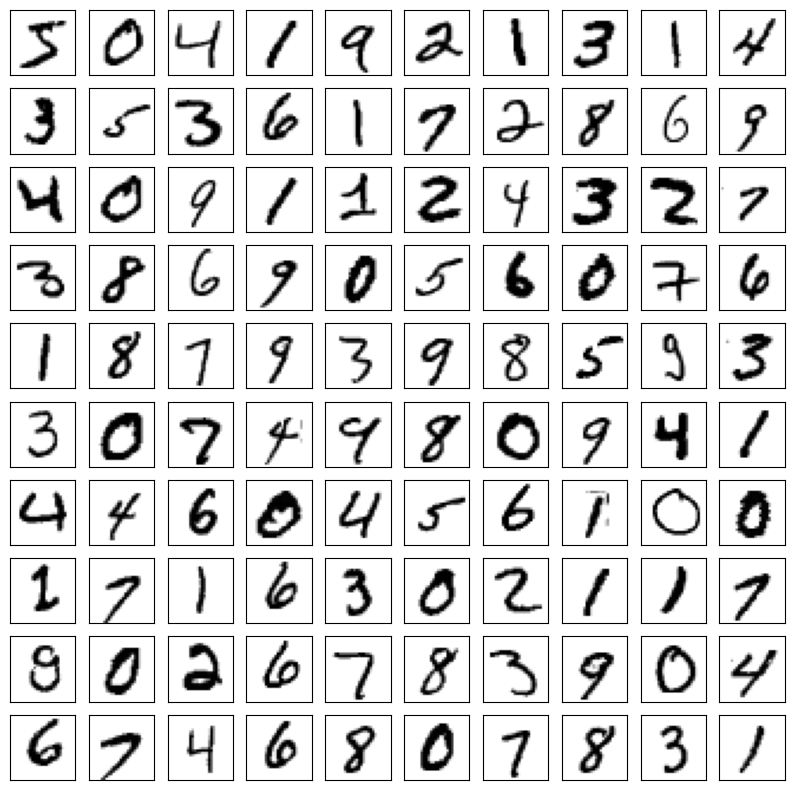

In [18]:
# Show the first NxN images in a NxN grid
N = 10
plt.figure(figsize=(N,N))
for i in range(N*N):
    plt.subplot(N,N,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)

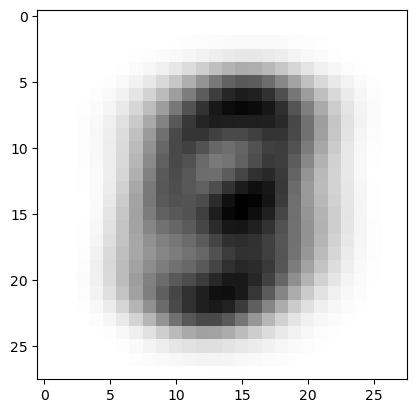

In [19]:
# Superpose all the images from 0 to N in a single image
N = 60000
superposed = np.zeros((28, 28))
for i in range(N):
    superposed += X_train[i]
plt.imshow(superposed, cmap=plt.cm.binary)


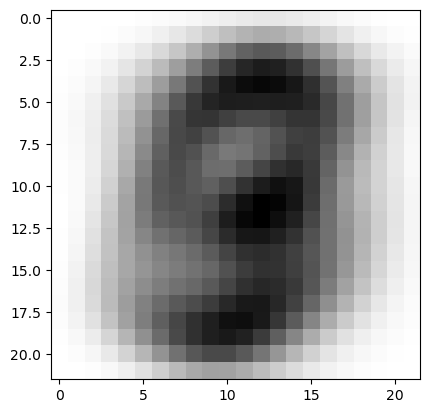

In [20]:
# Supperpose all the images from 0 to N in a single image
# But show only from pixel 3 to 25 both vertically and horizontally
superposed = np.zeros((22, 22))
for i in range(N):
    superposed += X_train[i][3:25, 3:25]
plt.imshow(superposed, cmap=plt.cm.binary)

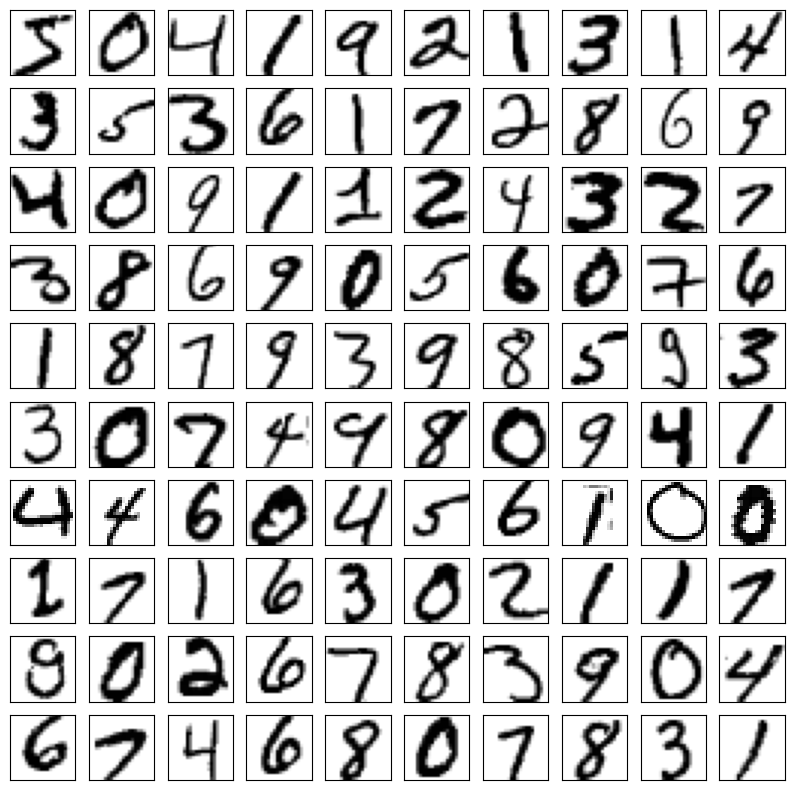

In [21]:
# Show the first NxN images in a NxN grid
# But only from pixel IMG_SIZE to pixel IMG_SIZE - PAD
N = 10
PAD = 3
IMG_SIZE = 28
plt.figure(figsize=(N,N))
for i in range(N*N):
    plt.subplot(N,N,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i][PAD:IMG_SIZE-PAD, PAD:IMG_SIZE-PAD], cmap=plt.cm.binary)

In [22]:
# Change size of all images to IMG_SIZE - 2*PAD
PAD = 3
IMG_SIZE = 28
X_train_truncated = X_train[:,PAD:IMG_SIZE-PAD, PAD:IMG_SIZE-PAD]
X_test_truncated = X_test[:,PAD:IMG_SIZE-PAD, PAD:IMG_SIZE-PAD]

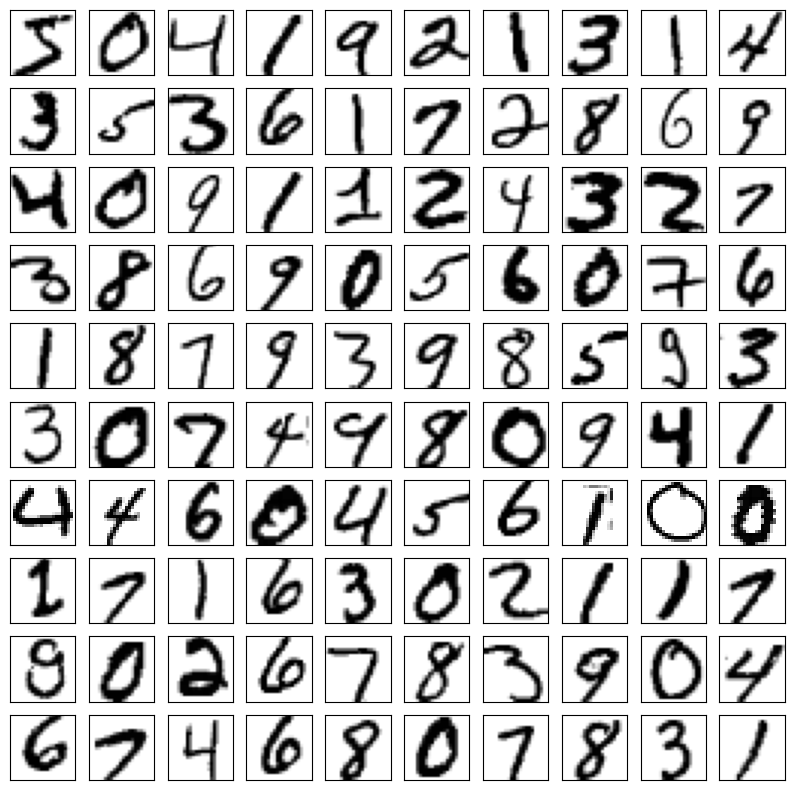

In [23]:
# Show the first NxN images in an NxN grid
N = 10
plt.figure(figsize=(N,N))
for i in range(N*N):
    plt.subplot(N,N,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_truncated[i], cmap=plt.cm.binary)

In [24]:
# Show the gray value content of the first image as a matrix
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

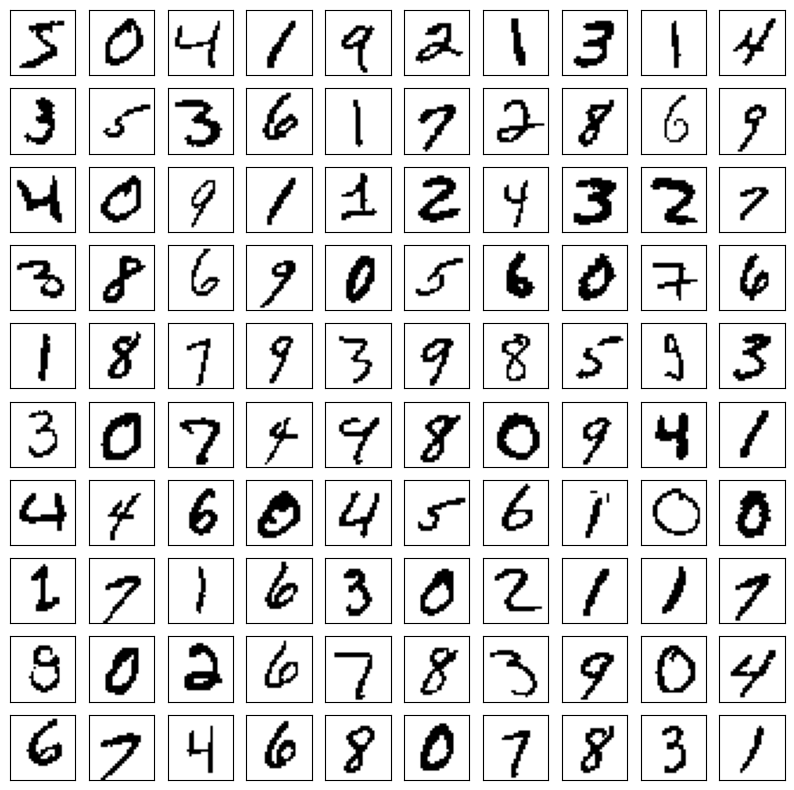

In [ ]:
# Convert the first NxN image to binary images and show them in a NxN grid
N = 10
plt.figure(figsize=(N,N))
for i in range(N*N):
    plt.subplot(N,N,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i] > 128, cmap=plt.cm.binary)

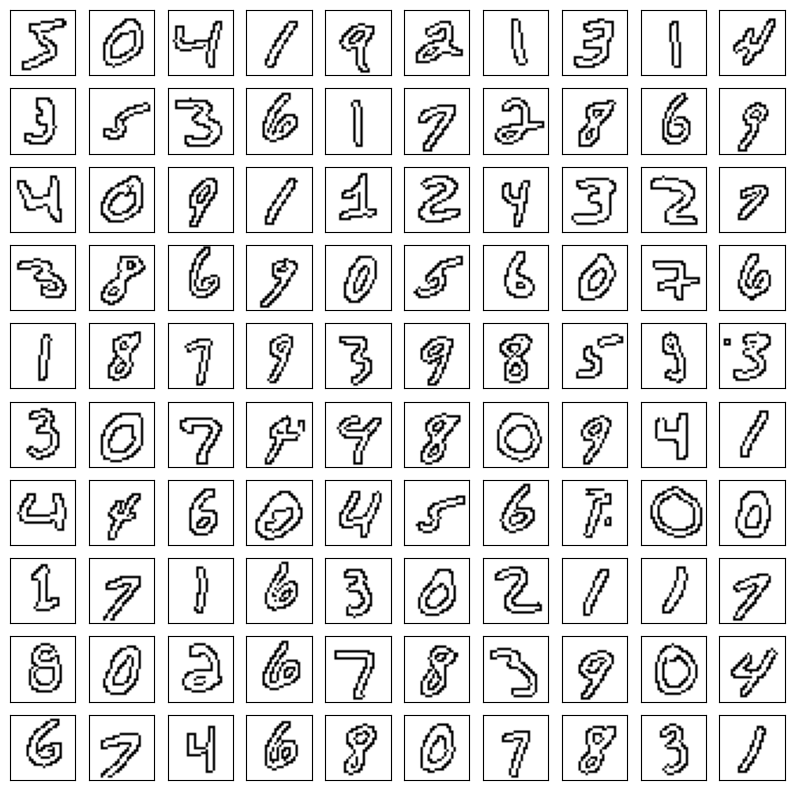

In [ ]:
# Run canny edge detection on the first NxN image and show them in a NxN grid
from skimage import feature

N = 10
plt.figure(figsize=(N,N))
for i in range(N*N):
    plt.subplot(N,N,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(feature.canny(X_train[i], 1), cmap=plt.cm.binary)

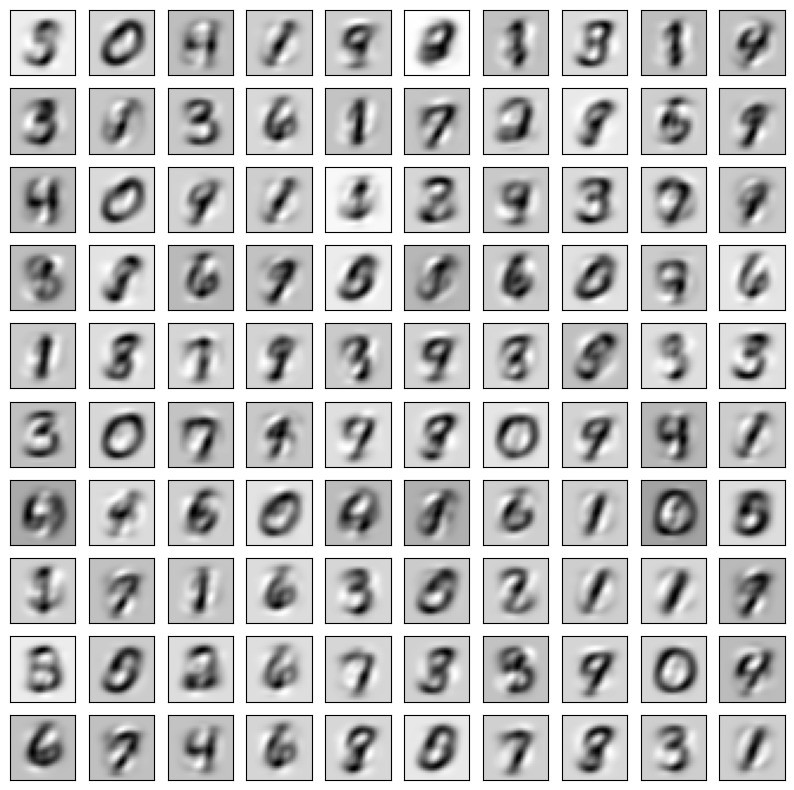

In [ ]:
# Create eigen images for the first NxN images and show them in a NxN grid
from sklearn.decomposition import PCA

N = 10
pca = PCA(n_components=10)
X_train_flat = X_train.reshape(-1, 28*28)
pca.fit(X_train_flat)
X_train_pca = pca.transform(X_train_flat)

plt.figure(figsize=(N,N))
for i in range(N*N):
    plt.subplot(N,N,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(pca.inverse_transform(X_train_pca[i]).reshape(28, 28), cmap=plt.cm.binary)

0: 5923
1: 6742
2: 5958
3: 6131
4: 5842
5: 5421
6: 5918
7: 6265
8: 5851
9: 5949


<BarContainer object of 10 artists>

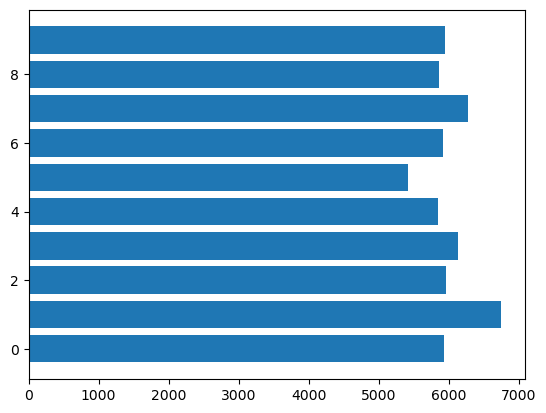

In [16]:
# Get the number of different classes
unique_values, value_counts = np.unique(y_train, return_counts=True)
for value, count in zip(unique_values, value_counts):
    print(f"{value}: {count}")

# Plot the number of different classes in a horizontal bar chart
plt.barh(unique_values, value_counts)

In [17]:
import cv2
import numpy as np

# Load the image 0 from the training set and call it image
image = X_train[0]

# Define the rotation angle in degrees
angle = 30

# Get the center of the image
height, width = image.shape[:2]
center = (width / 2, height / 2)

# Define the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)

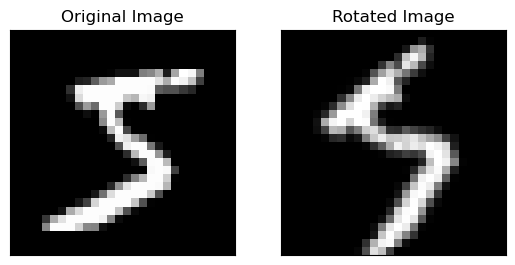

In [18]:
# Apply the rotation to the image
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

# Display the rotated image
cv2.imshow('Rotated Image', rotated_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# Display both the original and the rotated image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.xticks([])
plt.yticks([])
plt.grid(False)

plt.subplot(1, 2, 2)
plt.imshow(rotated_image, cmap='gray')
plt.title('Rotated Image')
plt.xticks([])
plt.yticks([])
plt.grid(False)

In [19]:
# For each image in the dataset X_train, rotate it by angles from 0 to 360 degrees by 10 degrees steps, save the rotated images in X_train_rotated and add the corresponding label of the same original image to y_train_rotated
X_train_rotated = []
y_train_rotated = []

for i in range(len(X_train)):
    for angle in range(-60, +60, 10):
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
        rotated_image = cv2.warpAffine(X_train[i], rotation_matrix, (width, height))
        X_train_rotated.append(rotated_image)
        y_train_rotated.append(y_train[i])

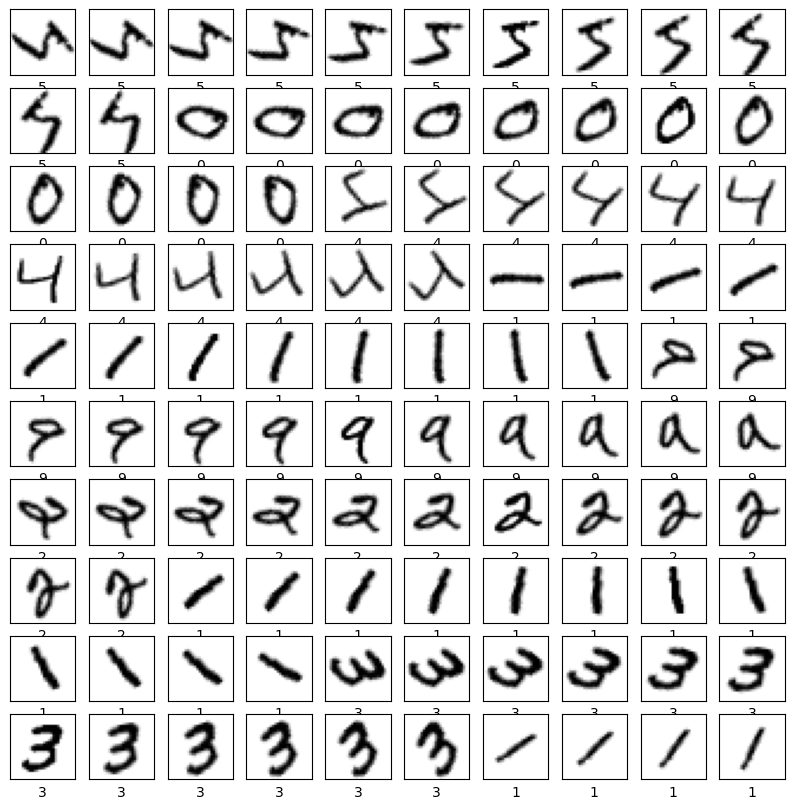

In [20]:
# Show the first NxN images in X_train_rotated in a NxN grid with its corresponding label from y_train_rotated
N = 10
plt.figure(figsize=(N,N))
for i in range(N*N):
    plt.subplot(N,N,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_rotated[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_rotated[i])

In [21]:
# Show the sizes of all dimensions of the X_train_rotated and y_train_rotated
print(len(X_train_rotated))
print(len(y_train_rotated))

720000
720000


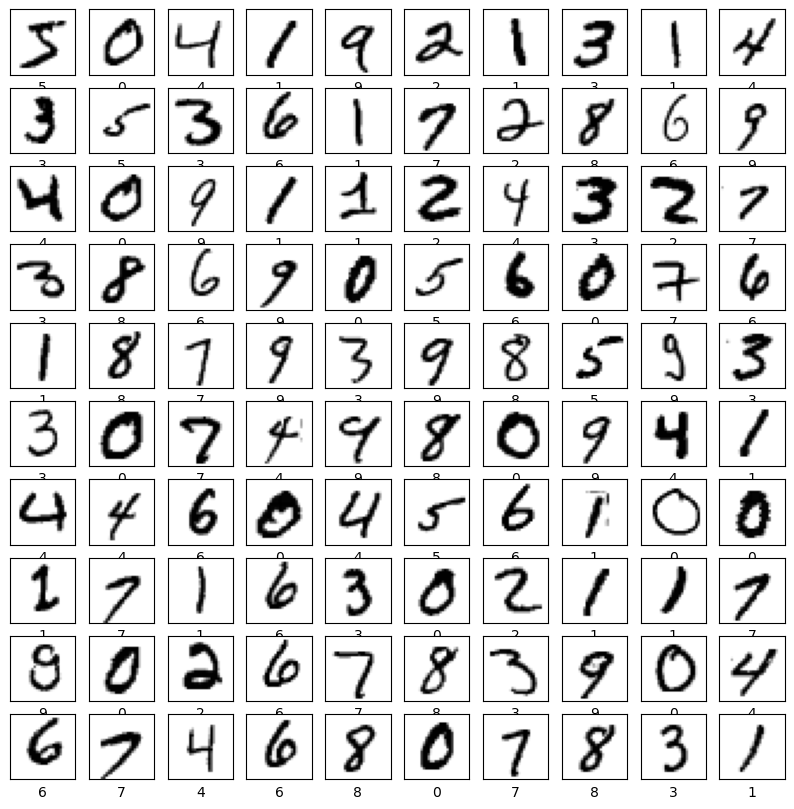

In [22]:
# Add these rotated images to the original dataset and call it X_train_augmented
X_train_augmented = np.concatenate([X_train, X_train_rotated])
y_train_augmented = np.concatenate([y_train, y_train_rotated])

# Show the first NxN images in X_train_augmented in a NxN grid and their corresponding labels from y_train_augmented
N = 10
plt.figure(figsize=(N,N))
for i in range(N*N):
    plt.subplot(N,N,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_augmented[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_augmented[i])

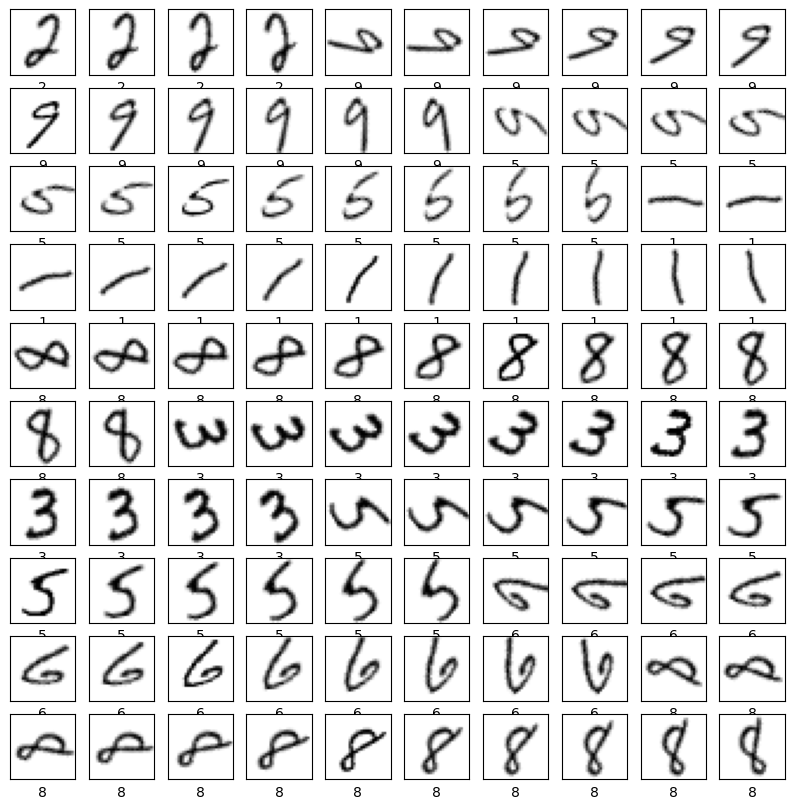

In [23]:
# Also show the last NxN images in X_train_augmented in a NxN grid and their corresponding labels
N = 10
plt.figure(figsize=(N,N))
for i in range(N*N):
    plt.subplot(N,N,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_augmented[-N*N+i], cmap=plt.cm.binary)
    plt.xlabel(y_train_augmented[-N*N+i])

In [24]:
# Shuffle the dataset X_train_augmented and y_train_augmented
np.random.seed(42)
shuffle_index = np.random.permutation(len(X_train_augmented))
X_train_augmented, y_train_augmented = X_train_augmented[shuffle_index], y_train_augmented[shuffle_index]

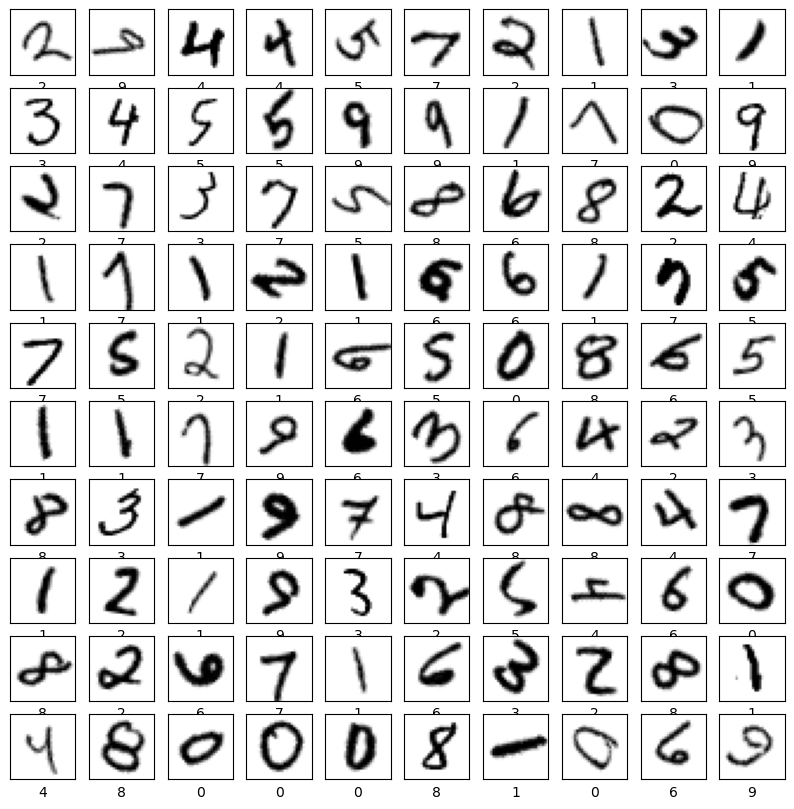

In [25]:
# Show the first NxN images in X_train_augmented in a NxN grid and their corresponding labels from y_train_augmented
N = 10
plt.figure(figsize=(N,N))
for i in range(N*N):
    plt.subplot(N,N,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_augmented[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_augmented[i])

In [26]:
# Show the size of the X_train_augmented
print(X_train_augmented.shape)

(780000, 28, 28)


In [26]:
# Separate the first 6000 images from X_train_augmented and y_train_augmented and call them X_train_small and y_train_small
X_augmented_small = X_train_augmented[:6000]
y_augmented_small = y_train_augmented[:6000]

In [29]:
# Define a random forest classifier with cross validation and optuna and show the accuracy of the best model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
import optuna

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 2, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, criterion=criterion)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_augmented_small.reshape(-1, 28*28), y_augmented_small, cv=kfold, scoring='accuracy')
    accuracy = score.mean()
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print(study.best_params)
print(study.best_value)

[I 2024-03-16 03:03:50,793] A new study created in memory with name: no-name-5c0581a0-910d-42fd-8f50-70dc6ace000a


[I 2024-03-16 03:03:56,207] Trial 0 finished with value: 0.6659999999999999 and parameters: {'n_estimators': 90, 'max_depth': 29, 'min_samples_split': 4, 'min_samples_leaf': 18, 'max_features': 'log2', 'criterion': 'entropy'}. Best is trial 0 with value: 0.6659999999999999.
[I 2024-03-16 03:04:08,512] Trial 1 finished with value: 0.675 and parameters: {'n_estimators': 71, 'max_depth': 13, 'min_samples_split': 18, 'min_samples_leaf': 16, 'max_features': 'sqrt', 'criterion': 'entropy'}. Best is trial 1 with value: 0.675.
[I 2024-03-16 03:04:35,714] Trial 2 finished with value: 0.6666666666666666 and parameters: {'n_estimators': 187, 'max_depth': 22, 'min_samples_split': 3, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'criterion': 'entropy'}. Best is trial 1 with value: 0.675.
[I 2024-03-16 03:04:47,261] Trial 3 finished with value: 0.7243333333333333 and parameters: {'n_estimators': 158, 'max_depth': 27, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'log2', 'criterion

{'n_estimators': 194, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'criterion': 'gini'}
0.7681666666666668


In [27]:
# Separate the first 6000 images from X_train and y_train and call them X_train_small and y_train_small
X_train_small = X_train[:6000]
y_train_small = y_train[:6000]

In [33]:
# Define a random forest classifier with cross validation and optuna and show the accuracy of the best model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
import optuna

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 2, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, criterion=criterion)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_small.reshape(-1, 28*28), y_train_small, cv=kfold, scoring='accuracy')
    accuracy = score.mean()
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print(study.best_params)
print(study.best_value)

[I 2024-03-16 03:46:14,367] A new study created in memory with name: no-name-0395d9a6-6a5d-4359-bc00-22ef12a7b5b7
[I 2024-03-16 03:46:29,618] Trial 0 finished with value: 0.9329999999999998 and parameters: {'n_estimators': 150, 'max_depth': 27, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'criterion': 'gini'}. Best is trial 0 with value: 0.9329999999999998.
[I 2024-03-16 03:46:36,640] Trial 1 finished with value: 0.8121666666666666 and parameters: {'n_estimators': 144, 'max_depth': 4, 'min_samples_split': 19, 'min_samples_leaf': 16, 'max_features': 'sqrt', 'criterion': 'gini'}. Best is trial 0 with value: 0.9329999999999998.
[I 2024-03-16 03:46:57,911] Trial 2 finished with value: 0.9296666666666666 and parameters: {'n_estimators': 198, 'max_depth': 15, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'criterion': 'gini'}. Best is trial 0 with value: 0.9329999999999998.
[I 2024-03-16 03:47:00,922] Trial 3 finished with value: 0.656666666

{'n_estimators': 185, 'max_depth': 31, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'criterion': 'gini'}
0.9446666666666668


: 

In [28]:
# Separate the first 6000 images from X_train and y_train and call them X_train_small and y_train_small
X_train_small = X_train[:16000]
y_train_small = y_train[:16000]

In [29]:
# Run random forest classifier with the parameters 
# 'n_estimators': 185, 'max_depth': 31, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'criterion': 'gini'
# Show the accuracy as percentage
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

model = RandomForestClassifier(n_estimators=185, max_depth=31, min_samples_split=3, min_samples_leaf=1, max_features='sqrt', criterion='gini')
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(model, X_train_small.reshape(-1, 28*28), y_train_small, cv=kfold, scoring='accuracy')
accuracy = score.mean()
print(f"{accuracy*100:.2f}%")

95.56%


In [30]:
# Separate the first 6000 images from X_train and y_train and call them X_train_small and y_train_small
X_train_small = X_train[:6000]
y_train_small = y_train[:6000]

In [59]:
# Define a SVC with cross validation and optuna and show the parameters and accuracy of the best model
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
import optuna

def objective(trial):
    C = trial.suggest_float('C', 1e-10, 1e10, log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    degree = trial.suggest_int('degree', 2, 5)
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

    model = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_small.reshape(-1, 28*28), y_train_small, cv=kfold, scoring='accuracy')
    accuracy = score.mean()
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print(study.best_params)
print(study.best_value)

[I 2024-03-16 14:46:57,079] A new study created in memory with name: no-name-7fe51343-d1d5-45b1-b821-f880ac46d986
/var/folders/1s/vk0n_73d4ndcz49qcnxf6wf40000gp/T/ipykernel_1580/1585890623.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-10, 1e10)
[I 2024-03-16 14:47:11,883] Trial 0 finished with value: 0.922 and parameters: {'C': 0.025048189337396293, 'kernel': 'linear', 'degree': 2, 'gamma': 'auto'}. Best is trial 0 with value: 0.922.
/var/folders/1s/vk0n_73d4ndcz49qcnxf6wf40000gp/T/ipykernel_1580/1585890623.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-10, 1e10)
[I 2024-03-16 14:47:26,

{'C': 6.8799807279662, 'kernel': 'rbf', 'degree': 3, 'gamma': 'scale'}
0.9615


In [61]:
# Separate the first 6000 images from X_train and y_train and call them X_train_small and y_train_small
X_train_small = X_train_augmented[:6000]
y_train_small = y_train_augmented[:6000]

In [62]:
# Define a SVC with cross validation and optuna and show the parameters and accuracy of the best model
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
import optuna

def objective(trial):
    C = trial.suggest_loguniform('C', 1e-10, 1e10)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    degree = trial.suggest_int('degree', 2, 5)
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

    model = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_small.reshape(-1, 28*28), y_train_small, cv=kfold, scoring='accuracy')
    accuracy = score.mean()
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print(study.best_params)
print(study.best_value)

[I 2024-03-16 16:12:02,523] A new study created in memory with name: no-name-889d34ed-f28d-496f-af72-02d97c663bb4
/var/folders/1s/vk0n_73d4ndcz49qcnxf6wf40000gp/T/ipykernel_1580/1585890623.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-10, 1e10)
[I 2024-03-16 16:12:28,920] Trial 0 finished with value: 0.8831666666666667 and parameters: {'C': 0.0008618488673040869, 'kernel': 'poly', 'degree': 2, 'gamma': 'auto'}. Best is trial 0 with value: 0.8831666666666667.
/var/folders/1s/vk0n_73d4ndcz49qcnxf6wf40000gp/T/ipykernel_1580/1585890623.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-10, 1e10

{'C': 633515148.5450886, 'kernel': 'rbf', 'degree': 4, 'gamma': 'scale'}
0.9033333333333333


In [31]:
# Separate the first 6000 images from X_train and y_train and call them X_train_small and y_train_small
X_train_small = X_train_augmented[:16000]
y_train_small = y_train_augmented[:16000]

In [76]:
# Run SVC with the parameters 'C': 633515148.5450886, 'kernel': 'rbf', 'degree': 4, 'gamma': 'scale'
# Show the accuracy as percentage
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

model = SVC(C=633515148.5450886, kernel='rbf', degree=4, gamma='scale')
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(model, X_train_small.reshape(-1, 28*28), y_train_small, cv=kfold, scoring='accuracy')
accuracy = score.mean()
print(f"{accuracy*100:.2f}%")

93.64%


95.43%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.95      0.94      1032
           3       0.94      0.97      0.96      1010
           4       0.94      0.95      0.94       982
           5       0.95      0.95      0.95       892
           6       0.97      0.96      0.96       958
           7       0.94      0.94      0.94      1028
           8       0.98      0.91      0.94       974
           9       0.95      0.93      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



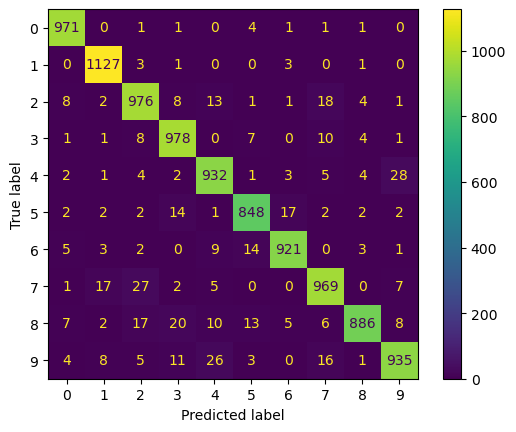

In [77]:
# Train the above model on the test set and show the accuracy, classification report, and confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model.fit(X_train_small.reshape(-1, 28*28), y_train_small)
y_pred = model.predict(X_test.reshape(-1, 28*28))
accuracy = np.mean(y_pred == y_test)
print(f"{accuracy*100:.2f}%")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()

In [47]:
# Separate the first 6000 images from X_train and y_train and call them X_train_small and y_train_small
X_train_small = X_train[:16000]
y_train_small = y_train[:16000]

In [19]:
# Run SVC with the parameters 'C': 633515148.5450886, 'kernel': 'rbf', 'degree': 4, 'gamma': 'scale'
# Show the accuracy as percentage
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

model = SVC(C=633515148.5450886, kernel='rbf', degree=4, gamma='scale')
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(model, X_train_small.reshape(-1, 28*28), y_train_small, cv=kfold, scoring='accuracy')
accuracy = score.mean()
print(f"{accuracy*100:.2f}%")

97.50%


97.34%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.97      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



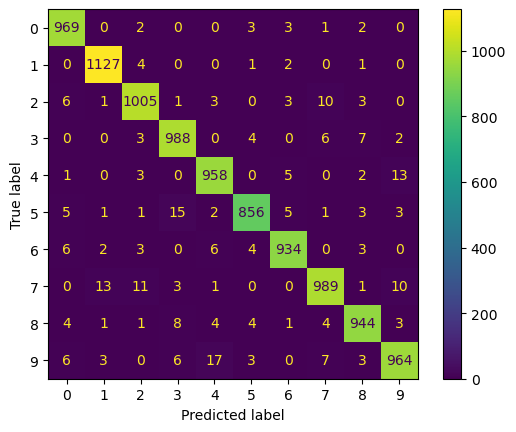

In [20]:
# Train the above model on the test set and show the accuracy, classification report, and confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model.fit(X_train_small.reshape(-1, 28*28), y_train_small)
y_pred = model.predict(X_test.reshape(-1, 28*28))
accuracy = np.mean(y_pred == y_test)
print(f"{accuracy*100:.2f}%")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()

In [27]:
# Separate the first 6000 images from X_train and y_train and call them X_train_small and y_train_small 
X_train_small = X_train[:6000]
y_train_small = y_train[:6000]

In [28]:
# Define and fine tune an XGBoost model with cross validation and optuna and show the parameters and accuracy of the best model
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
import optuna

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 2, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    learning_rate = trial.suggest_float('learning_rate', 1e-10, 1e10, log=True)
    subsample = trial.suggest_float('subsample', 0.1, 1)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.1, 1)
    gamma = trial.suggest_float('gamma', 1e-10, 1e10, log=True)

    model = xgb.XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, subsample=subsample, colsample_bytree=colsample_bytree, gamma=gamma)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_small.reshape(-1, 28*28), y_train_small, cv=kfold, scoring='accuracy')
    accuracy = score.mean()
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print(study.best_params)
print(study.best_value)

[I 2024-03-19 22:06:30,181] A new study created in memory with name: no-name-630591d3-bbba-4358-9066-1be314d2fb43
[I 2024-03-19 22:07:01,450] Trial 0 finished with value: 0.8564999999999999 and parameters: {'n_estimators': 54, 'max_depth': 22, 'learning_rate': 1.8979644405397953, 'subsample': 0.6734391298238945, 'colsample_bytree': 0.3632545093046301, 'gamma': 0.27264634605994614}. Best is trial 0 with value: 0.8564999999999999.
[I 2024-03-19 22:07:36,534] Trial 1 finished with value: 0.6214999999999999 and parameters: {'n_estimators': 163, 'max_depth': 13, 'learning_rate': 1723228.387187699, 'subsample': 0.1016539468503024, 'colsample_bytree': 0.8130550063546904, 'gamma': 1.338003546487121e-06}. Best is trial 0 with value: 0.8564999999999999.
[I 2024-03-19 22:08:19,631] Trial 2 finished with value: 0.23650000000000002 and parameters: {'n_estimators': 165, 'max_depth': 14, 'learning_rate': 0.14170259391013215, 'subsample': 0.7434487752031126, 'colsample_bytree': 0.8161199951126058, 'ga

{'n_estimators': 159, 'max_depth': 18, 'learning_rate': 0.16359180406728466, 'subsample': 0.9607608761620962, 'colsample_bytree': 0.24259625214461825, 'gamma': 2.825637469844936e-09}
0.9481666666666667


In [27]:
# Separate the first 6000 images from X_train and y_train and call them X_train_small and y_train_small 
X_train_small = X_train[:16000]
y_train_small = y_train[:16000]

In [28]:
# Run XGBoost with the parameters 'n_estimators': 159, 'max_depth': 18, 'learning_rate': 0.16359180406728466, 'subsample': 0.9607608761620962, 'colsample_bytree': 0.24259625214461825, 'gamma': 2.825637469844936e-09
# Show the accuracy as percentage
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

model = xgb.XGBClassifier(n_estimators=159, max_depth=18, learning_rate=0.16359180406728466, subsample=0.9607608761620962, colsample_bytree=0.24259625214461825, gamma=2.825637469844936e-09)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(model, X_train_small.reshape(-1, 28*28), y_train_small, cv=kfold, scoring='accuracy')
accuracy = score.mean()
print(f"{accuracy*100:.2f}%")

96.31%


96.49%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.95      0.96      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.95      0.96      1028
           8       0.95      0.96      0.95       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



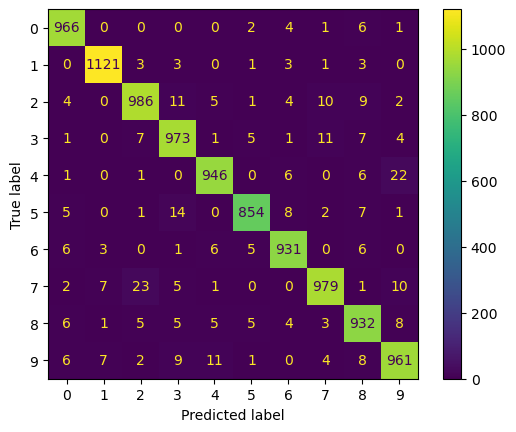

In [29]:
# Train the above model on the test set and show the accuracy, classification report, and confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model.fit(X_train_small.reshape(-1, 28*28), y_train_small)
y_pred = model.predict(X_test.reshape(-1, 28*28))
accuracy = np.mean(y_pred == y_test)
print(f"{accuracy*100:.2f}%")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()

In [30]:
# Try dimensionality reduction with PCA and show the explained variance ratio
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_small.reshape(-1, 28*28))
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)

152


In [31]:
# Compare the accuracy of the XGBoost model with and without PCA
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

model = xgb.XGBClassifier(n_estimators=159, max_depth=18, learning_rate=0.16359180406728466, subsample=0.9607608761620962, colsample_bytree=0.24259625214461825, gamma=2.825637469844936e-09)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(model, X_train_small.reshape(-1, 28*28), y_train_small, cv=kfold, scoring='accuracy')
accuracy = score.mean()
print(f"{accuracy*100:.2f}%")

# Show the results of the comparison with and without PCA separately
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA

pca = PCA(n_components=154)
X_train_small_pca = pca.fit_transform(X_train_small.reshape(-1, 28*28))
X_test_pca = pca.transform(X_test.reshape(-1, 28*28))

model = xgb.XGBClassifier(n_estimators=159, max_depth=18, learning_rate=0.16359180406728466, subsample=0.9607608761620962, colsample_bytree=0.24259625214461825, gamma=2.825637469844936e-09)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(model, X_train_small_pca, y_train_small, cv=kfold, scoring='accuracy')
accuracy = score.mean()
print(f"{accuracy*100:.2f}%")

96.31%
93.83%


In [32]:
# Separate the first 6000 images from X_train and y_train and call them X_train_small and y_train_small 
X_train_small = X_train[:16000]
y_train_small = y_train[:16000]

In [33]:
# Compare the accuracy of the random forest classifier with the parameters 'n_estimators': 185, 'max_depth': 31, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'criterion': 'gini' with and without PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA

model = RandomForestClassifier(n_estimators=185, max_depth=31, min_samples_split=3, min_samples_leaf=1, max_features='sqrt', criterion='gini')
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(model, X_train_small.reshape(-1, 28*28), y_train_small, cv=kfold, scoring='accuracy')
accuracy = score.mean()
print(f"{accuracy*100:.2f}%")

# Show the results of the comparison with and without PCA separately
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA

pca = PCA(n_components=154)
X_train_small_pca = pca.fit_transform(X_train_small.reshape(-1, 28*28))
X_test_pca = pca.transform(X_test.reshape(-1, 28*28))

model = RandomForestClassifier(n_estimators=185, max_depth=31, min_samples_split=3, min_samples_leaf=1, max_features='sqrt', criterion='gini')
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(model, X_train_small_pca, y_train_small, cv=kfold, scoring='accuracy')
accuracy = score.mean()
print(f"{accuracy*100:.2f}%")


95.44%
92.96%


In [18]:
# Separate the first 6000 images from X_train and y_train and call them X_train_small and y_train_small 
X_train_small = X_train[:20000]
y_train_small = y_train[:20000]

In [36]:
# Run SVC with the parameters 'C': 633515148.5450886, 'kernel': 'rbf', 'degree': 4, 'gamma': 'scale' with and without PCA
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA

model = SVC(C=633515148.5450886, kernel='rbf', degree=4, gamma='scale', probability=True)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(model, X_train_small.reshape(-1, 28*28), y_train_small, cv=kfold, scoring='accuracy')

accuracy = score.mean()
print(f"{accuracy*100:.2f}%")

# Show the results of the comparison with and without PCA separately
pca = PCA(n_components=154)
X_train_small_pca = pca.fit_transform(X_train_small.reshape(-1, 28*28))
X_test_pca = pca.transform(X_test.reshape(-1, 28*28))

model = SVC(C=633515148.5450886, kernel='rbf', degree=4, gamma='scale', probability=True)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(model, X_train_small_pca, y_train_small, cv=kfold, scoring='accuracy')
accuracy = score.mean()
print(f"{accuracy*100:.2f}%")

97.60%
97.89%


In [19]:
# Run the model on the test set and show the accuracy, classification report, and confusion matrix
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model.fit(X_train_small.reshape(-1, 28*28), y_train_small)
y_pred = model.predict(X_test.reshape(-1, 28*28))
accuracy = np.mean(y_pred == y_test)
print(f"{accuracy*100:.2f}%")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()

97.64%
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [20]:
# Save the latest model to a file
import joblib

joblib.dump(model, 'model.joblib')

['model.joblib']

In [21]:
import matplotlib.pyplot as plt 

# Show images of 12 images that have been misclassified
N = 20
plt.figure(figsize=(N,N))
for i in range(N):
    plt.subplot(1,N,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[y_pred != y_test][i], cmap=plt.cm.binary)
    plt.xlabel(f"{y_test[y_pred != y_test][i]} -> {y_pred[y_pred != y_test][i]}")

In [25]:
# Use model.joblib in streamlit to predict the number in that image that is uploaded by the user
# Use the following code in streamlit
import streamlit as st
from PIL import Image
import numpy as np
import joblib

model = joblib.load('model.joblib')

#st.title('Number Predictor')
#st.write('This app predicts the number in the image uploaded by the user')

uploaded_file = "mnist_images/2/image_190.png"

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    plt.imshow(image, cmap=plt.cm.binary)

    image = image.resize((28, 28))
    image = np.array(image)
    image = 255 - image
    image = image.reshape(1, 28*28)
    prediction = model.predict(image)

    print(f"The number in the image is {prediction[0]}, by 95% probability")
    print()
    print("The next top 2 numbers with the highest probability are:")
    print(model.classes_[np.argsort(model.predict_proba(image)[0])[-2]], "with 90% chance")
    print(model.classes_[np.argsort(model.predict_proba(image)[0])[-3]], "with 90% chance")

The number in the image is 2, by 95% probability

The next top 2 numbers with the highest probability are:
3 with 90% chance
6 with 90% chance


TODO : Add as argument for why PCA does not improve the model. That's because the model is not using regularization and the model is not overfitting. In other words, the model is not complex enough to benefit from PCA.

TODO : Implement a pipeline for the whole process of data preprocessing, model training and evaluation.

TODO : Try normalization or argue why it is not necessary.

TODO : Try other methods for feature engineering

TODO : Use the whole dataset

TODO : Use several models at the same time and use cross validation to choose the best.

TODO : REMEMBER TO LOOK AT HOW THE FINAL MODEL CALSSIFIES DIFFERENT DIGITS.

LATER TODO : Implement a code that rotates the numbers in the images around the z-axis